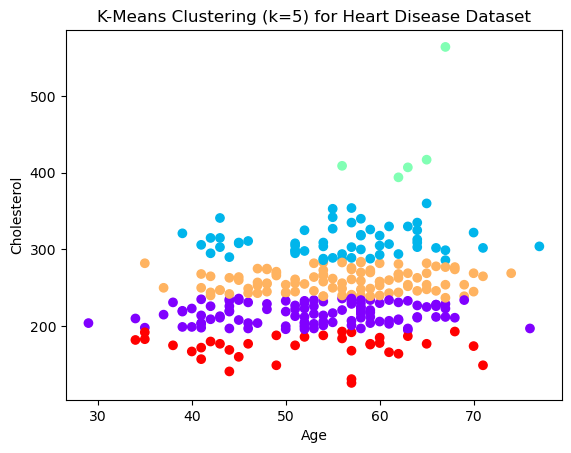

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

# load the dataset
data = pd.read_csv('Dataset heart-disease-dataset.csv')

# select the columns for clustering
X = data[['age', 'chol']]

# perform K-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

#removes warning that tells us n_init will change from 10 to 'auto'
warnings.filterwarnings("ignore")

# create a scatter plot to visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means Clustering (k=5) for Heart Disease Dataset')
plt.show()


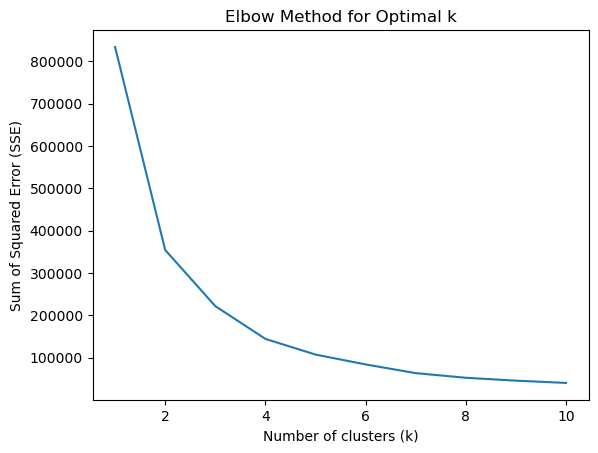

The optimal number of clusters (k) is 3


In [13]:
from kneed import KneeLocator
# create a list to store SSE values for each k
sse = []

# fit the K-means model for each k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

# plot the SSE values for each k
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# use the KneeLocator to estimate the optimal k
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

print(f'The optimal number of clusters (k) is {optimal_k}')


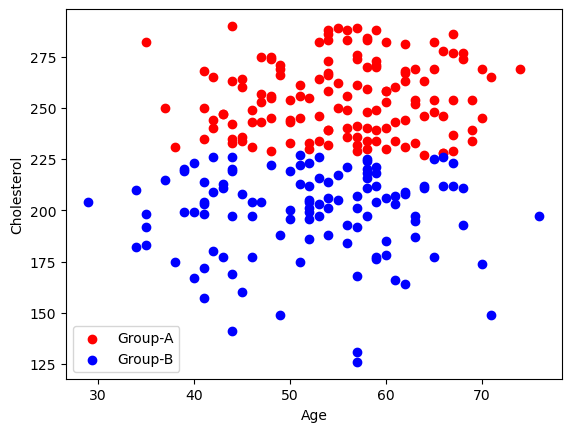

In [12]:
# optimal k value obtained from Q2
k = 3

# apply k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(data[['age', 'chol']])

# add a new column to the DataFrame with the assigned cluster labels
data['cluster'] = kmeans.labels_

# create a scatter plot of age vs cholesterol and color code the data points based on their assigned cluster labels
plt.scatter(data[data.cluster == 0]['age'], data[data.cluster == 0]['chol'], color='red', label='Group-A')
plt.scatter(data[data.cluster == 1]['age'], data[data.cluster == 1]['chol'], color='blue', label='Group-B')

# label the axes
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# add a legend
plt.legend()

# show the plot
plt.show()

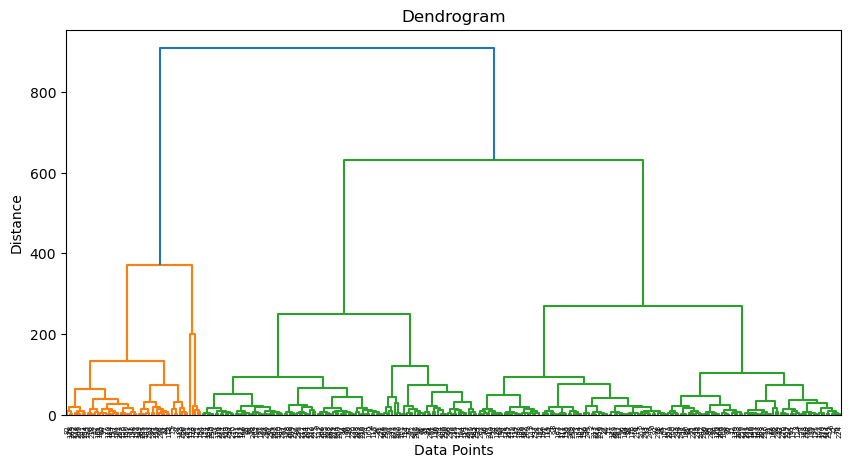

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate linkage matrix using Ward's method
Z = linkage(X, method='ward')

# plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

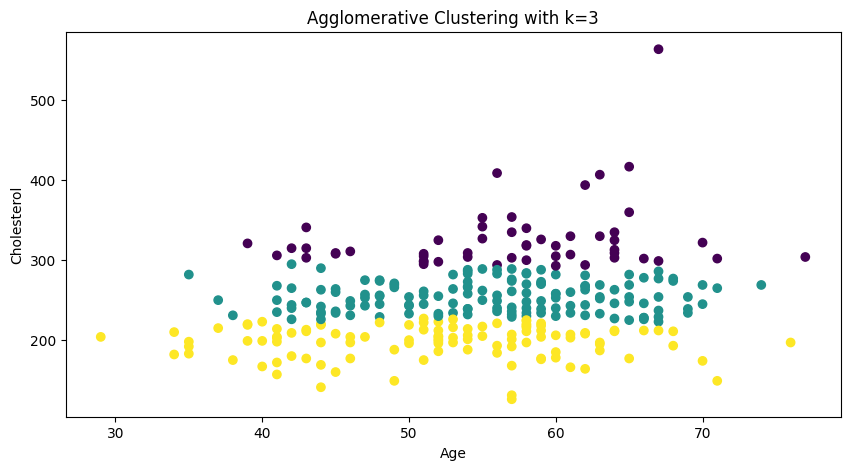

In [29]:

from sklearn.cluster import AgglomerativeClustering

# create an instance of AgglomerativeClustering with k=3
agg_clustering = AgglomerativeClustering(n_clusters=3)

# fit the model on the data
agg_clustering.fit(X)

# assign the labels to each data point
labels = agg_clustering.labels_

# visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X['age'], X['chol'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Agglomerative Clustering with k=3')
plt.show()


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
agg_silhouette_score = silhouette_score(X, agg_labels)

print("K-means silhouette score:", kmeans_silhouette_score)
print("Agglomerative silhouette score:", agg_silhouette_score)

K-means silhouette score: 0.46850176100308877
Agglomerative silhouette score: 0.46667548711611545


After running this code, we can see that the K-means silhouette score is 0.4685 and the agglomerative silhouette score is 0.4666. The K-means clustering has a higher silhouette score, indicating that it is better for the given dataset.